In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
file3 = "../output/true_div_rm_5.csv"
df3 = pd.read_csv(file3,sep=",")
file1 = "../output/bc_hashes.csv"
df1 = pd.read_csv(file1,sep=",")

In [3]:
df1 = df1[df1["metric"]=="BC"]
df_box1 = df1[["num diffs","coverage","k-length","score"]]
df_box1["num diffs"] = df_box1["num diffs"]/2000000

df_box3 = df3[["num diffs","coverage","k-length","score"]]
df_box3["num diffs"] = df_box3["num diffs"]/2000000

df_box3 = pd.concat([df_box1,df_box3])

/tmp/ipykernel_3272935/1377226441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box1["num diffs"] = df_box1["num diffs"]/2000000
/tmp/ipykernel_3272935/1377226441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box3["num diffs"] = df_box3["num diffs"]/2000000


In [4]:
df_box3

,num diffs,coverage,k-length,score
0,0.000619,10,10,0.086426
4,0.000495,10,20,0.177465
8,0.000395,10,30,0.209427
12,0.000219,10,40,0.250304
16,0.000566,15,10,0.069484
...,...,...,...,...
561,0.000634,30,40,0.113116
562,0.000427,40,10,0.037936
563,0.000120,40,20,0.076740
564,0.001230,40,30,0.087934


In [5]:
# df_box3 = pd.DataFrame(df, columns=["num diffs","coverage","score","k-length"])
# df_box3.boxplot(by=["coverage","k-length"])
df_box3.groupby(["coverage","k-length"]).corr()

num diffs     score
coverage k-length                               
10       10       num diffs   1.000000  0.935644
                  score       0.935644  1.000000
         20       num diffs   1.000000  0.894345
                  score       0.894345  1.000000
         30       num diffs   1.000000  0.893146
                  score       0.893146  1.000000
         40       num diffs   1.000000  0.895088
                  score       0.895088  1.000000
15       10       num diffs   1.000000  0.956816
                  score       0.956816  1.000000
         20       num diffs   1.000000  0.955576
                  score       0.955576  1.000000
         30       num diffs   1.000000  0.882873
                  score       0.882873  1.000000
         40       num diffs   1.000000  0.823490
                  score       0.823490  1.000000
20       10       num diffs   1.000000  0.824390
                  score       0.824390  1.000000
         20       num diffs   1.000000  0.945116
                  score       0.945116  1.000000
         30       num diffs   1.000000  0.948533
                  score       0.948533  1.000000
         40       num diffs   1.000000  0.898604
                  score       0.898604  1.000000
30       10       num diffs   1.000000  0.880184
                  score       0.880184  1.000000
         20       num diffs   1.000000  0.852011
                  score       0.852011  1.000000
         30       num diffs   1.000000  0.754062
                  score       0.754062  1.000000
         40       num diffs   1.000000  0.910992
                  score       0.910992  1.000000
40       10       num diffs   1.000000  0.792729
                  score       0.792729  1.000000
         20       num diffs   1.000000  0.977264
                  score       0.977264  1.000000
         30       num diffs   1.000000  0.914408
                  score       0.914408  1.000000
         40       num diffs   1.000000  0.896194
                  score       0.896194  1.000000

/tmp/ipykernel_3272935/126863495.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_3272935/126863495.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_3272935/126863495.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

Coeff: 10
[3.76610513]
Coeff: 20
[9.43248977]
Coeff: 30
[16.69696976]
Coeff: 40
[17.92899748]


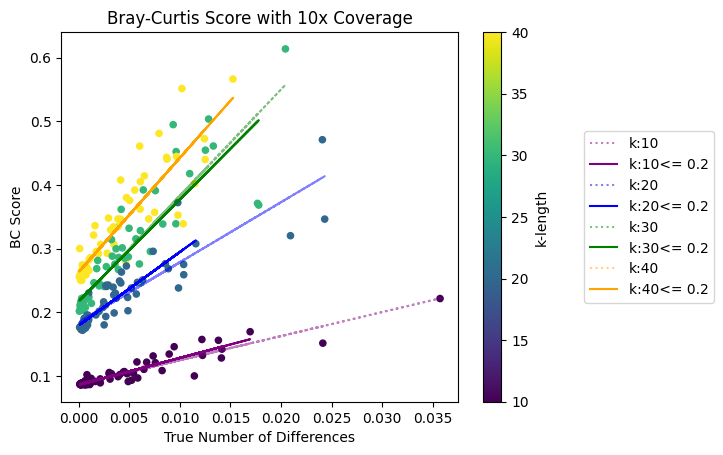

In [6]:
cov_10 = df_box3[df_box3["coverage"]==10]
# cov_10
fig, ax = plt.subplots()
cov_10.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_10[cov_10["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.title("Bray-Curtis Score with 10x Coverage")
ax.set_ylabel("BC Score")
ax.set_xlabel("True Number of Differences")
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_3272935/33101456.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_3272935/33101456.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_3272935/33101456.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Coeff: 10
[3.1078548]
Coeff: 20
[12.88961793]
Coeff: 30
[15.72051655]
Coeff: 40
[17.27757097]


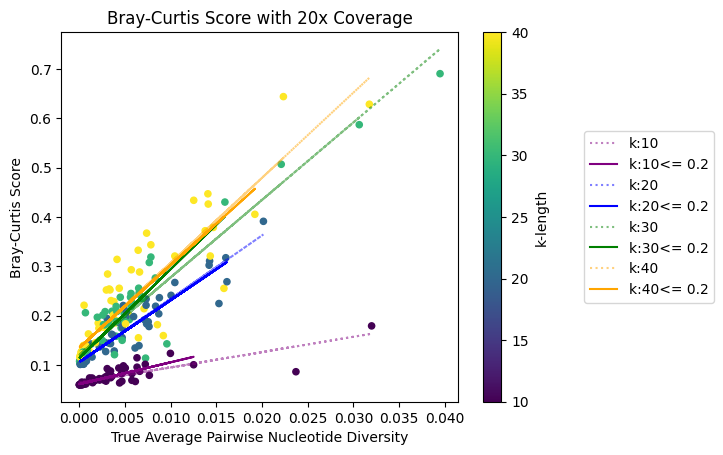

In [7]:
cov_20 = df_box3[df_box3["coverage"]==20]

# cov_20
fig, ax = plt.subplots()
cov_20.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_20[cov_20["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.title("Bray-Curtis Score with 20x Coverage")
ax.set_ylabel("Bray-Curtis Score")
ax.set_xlabel("True Average Pairwise Nucleotide Diversity")
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_3272935/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_3272935/2217191788.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_3272935/2217191788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Coeff: 10
[3.96001946]
Coeff: 20
[12.34074989]
Coeff: 30
[12.18304657]
Coeff: 40
[21.08487552]


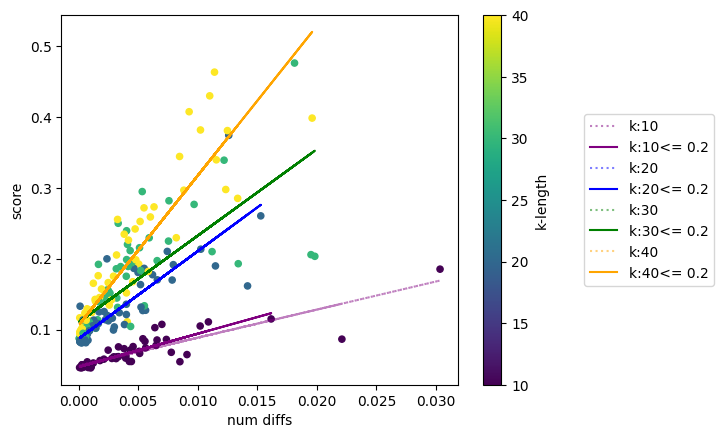

In [8]:
cov_30 = df_box3[df_box3["coverage"]==30]
# cov_10
fig, ax = plt.subplots()
cov_30.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_30[cov_30["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_3272935/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['k:' + str(k_lengths[i])] = reg.predict(X)
/tmp/ipykernel_3272935/1260264352.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)
/tmp/ipykernel_3272935/1260264352.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Coeff: 10
[3.24501562]
Coeff: 20
[14.17752441]
Coeff: 30
[16.99338451]
Coeff: 40
[18.26745361]


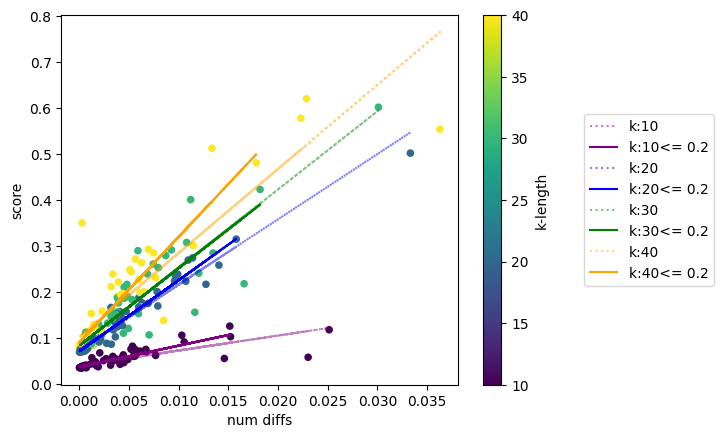

In [9]:
cov_40 = df_box3[df_box3["coverage"]==40]

# cov_10
fig, ax = plt.subplots()
cov_40.plot.scatter(y="score",x="num diffs",c="k-length",colormap='viridis',ax=ax,legend=False)

k_lengths = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(k_lengths)):
    sub_df = cov_40[cov_40["k-length"]==k_lengths[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['k:' + str(k_lengths[i])] = reg.predict(X)

    print("Coeff: " + str(k_lengths[i]))
    print(reg.coef_)

    sub_df.plot.line(y='k:' + str(k_lengths[i]),x="num diffs",ax=ax,color=color_1[i],linestyle='dotted',alpha=0.5)

    # Smaller line

    sub_df2 = sub_df[sub_df["num diffs"]<=.02]

    X = np.array(sub_df2['num diffs']).reshape(-1, 1)
    y = np.array(sub_df2['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df2['k:' + str(k_lengths[i]) + "<= 0.2"] = reg.predict(X)

    sub_df2.plot.line(y='k:' + str(k_lengths[i]) + "<= 0.2",x="num diffs",ax=ax,color=color_1[i])

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

In [10]:
klength_10 = df_box3[df_box3["k-length"]==10]
klength_10

,num diffs,coverage,k-length,score
0,0.000619,10,10,0.086426
16,0.000566,15,10,0.069484
32,0.000495,20,10,0.061305
48,0.000178,30,10,0.046635
64,0.000494,40,10,0.040951
...,...,...,...,...
546,0.004901,40,10,0.054451
550,0.000650,10,10,0.090457
554,0.000037,20,10,0.059489
558,0.000438,30,10,0.048627


/tmp/ipykernel_3272935/3215289540.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_3272935/3215289540.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_3272935/3215289540.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Coeff: 10
[3.76610513]
Coeff: 20
[3.1078548]
Coeff: 30
[3.96001946]
Coeff: 40
[3.24501562]


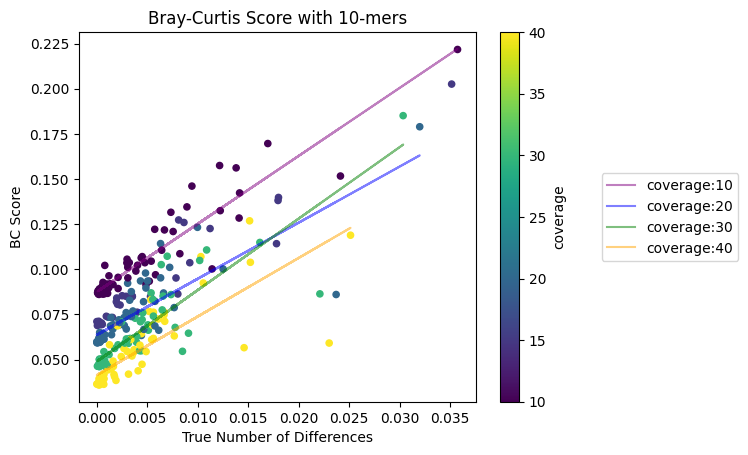

In [11]:
klength_10 = df_box3[df_box3["k-length"]==10]
# cov_10
fig, ax = plt.subplots()
klength_10.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_10[klength_10["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.title("Bray-Curtis Score with 10-mers")
ax.set_ylabel("BC Score")
ax.set_xlabel("True Number of Differences")
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_3272935/3681623544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_3272935/3681623544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_3272935/3681623544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Coeff: 10
[9.43248977]
Coeff: 20
[12.88961793]
Coeff: 30
[12.34074989]
Coeff: 40
[14.17752441]


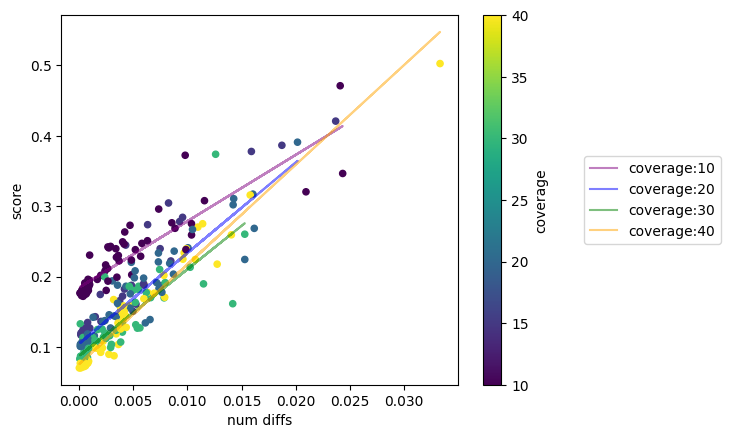

In [12]:
klength_20 = df_box3[df_box3["k-length"]==20]
# cov_10
fig, ax = plt.subplots()
klength_20.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_20[klength_20["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_3272935/3822261643.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_3272935/3822261643.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_3272935/3822261643.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Coeff: 10
[16.69696976]
Coeff: 20
[15.72051655]
Coeff: 30
[12.18304657]
Coeff: 40
[16.99338451]


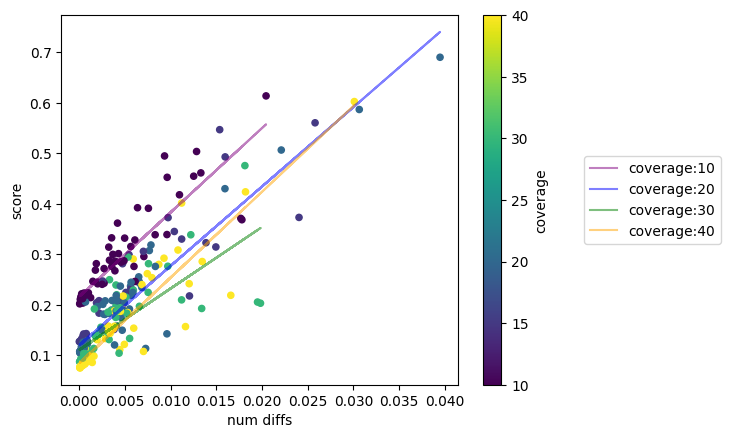

In [13]:
klength_30 = df_box3[df_box3["k-length"]==30]
# cov_10
fig, ax = plt.subplots()
klength_30.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_30[klength_30["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

/tmp/ipykernel_3272935/1605888226.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_3272935/1605888226.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['coverage:' + str(covs[i])] = reg.predict(X)
/tmp/ipykernel_3272935/1605888226.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Coeff: 10
[17.92899748]
Coeff: 20
[17.27757097]
Coeff: 30
[21.08487552]
Coeff: 40
[18.26745361]


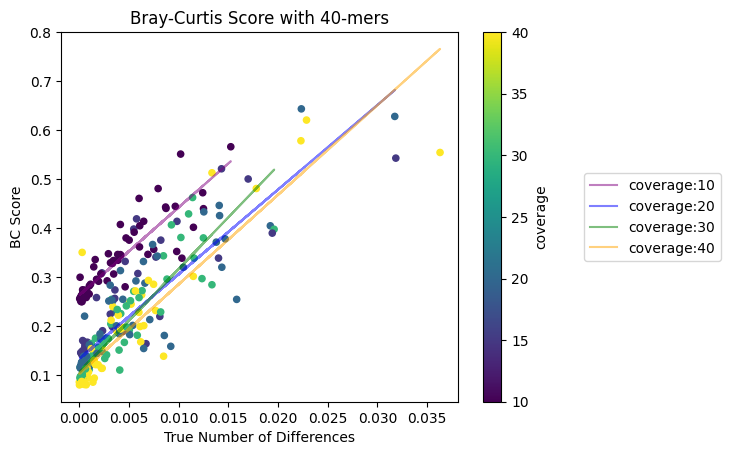

In [14]:
klength_40 = df_box3[df_box3["k-length"]==40]
# cov_10
fig, ax = plt.subplots()
klength_40.plot.scatter(y="score",x="num diffs",c="coverage",colormap='viridis',ax=ax,legend=False)

covs = [10,20,30,40]
color_1 = ["Purple","Blue","Green","Orange"]
color_2 = ["Orange","Pink","Teal","Red"]

for i in range(0,len(covs)):
    sub_df = klength_40[klength_40["coverage"]==covs[i]]

    X = np.array(sub_df['num diffs']).reshape(-1, 1)
    y = np.array(sub_df['score'])

    pltdf = pd.DataFrame()

    reg = LinearRegression().fit(X, y)
    sub_df['coverage:' + str(covs[i])] = reg.predict(X)

    print("Coeff: " + str(covs[i]))
    print(reg.coef_)

    sub_df.plot.line(y='coverage:' + str(covs[i]),x="num diffs",ax=ax,color=color_1[i],alpha=0.5)

plt.title("Bray-Curtis Score with 40-mers")
ax.set_ylabel("BC Score")
ax.set_xlabel("True Number of Differences")
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()